In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# AR model is suitable for data without trend and seasonality
from statsmodels.tsa.ar_model import AutoReg    

data = [10,12,14,16,18,20,21,21,22,23]

data = pd.read_csv("POP.csv")
data.head()

,realtime_start,value,date,realtime_end
0,2019-12-06,156309.0,1952-01-01,2019-12-06
1,2019-12-06,156527.0,1952-02-01,2019-12-06
2,2019-12-06,156731.0,1952-03-01,2019-12-06
3,2019-12-06,156943.0,1952-04-01,2019-12-06
4,2019-12-06,157140.0,1952-05-01,2019-12-06


In [3]:
data=data.set_index('date')
data = data["value"]

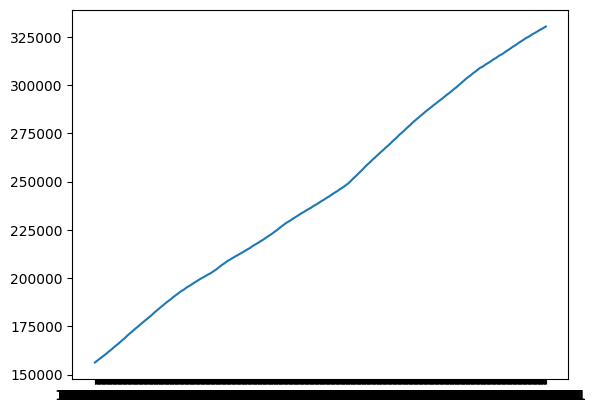

In [4]:
plt.plot(data)
plt.show()

In [20]:
ar_model = AutoReg(data, lags=1)
ar_fit = ar_model.fit()

/home/varaprasad/miniconda3/envs/llama/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [6]:
data.tail()

date
2019-08-01    329591.333
2019-09-01    329785.872
2019-10-01    329982.035
2019-11-01    330154.949
2019-12-01    330309.946
Name: value, dtype: float64

In [7]:
y_pred = ar_fit.forecast(steps=3)
y_pred

2020-01-01    330519.494275
2020-02-01    330729.032990
2020-03-01    330938.562144
Freq: MS, dtype: float64

In [8]:
comb = list(data.to_numpy()) + y_pred.tolist()

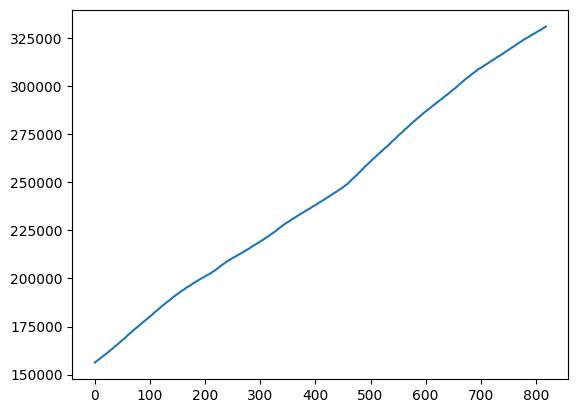

In [9]:
plt.plot(comb)

In [10]:
# MA model is suitable for data without trend and seasonality
from statsmodels.tsa.arima.model import ARIMA

ma_model = ARIMA(data, order=(0,0,1))
ma_fit = ma_model.fit()

/home/varaprasad/miniconda3/envs/llama/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/varaprasad/miniconda3/envs/llama/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/varaprasad/miniconda3/envs/llama/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [11]:
ma_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  816
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -9434.182
Date:                Fri, 24 May 2024   AIC                          18874.364
Time:                        16:44:41   BIC                          18888.477
Sample:                    01-01-1952   HQIC                         18879.780
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.438e+05   1818.571    134.088      0.000     2.4e+05    2.47e+05
ma.L1          1.0000      0.079     12.643      0.000       0.845       1.155
sigma2      6.585e+08   2.62e-07   2.51e+15      0.000    6.58e+08    6.58e+08
===================================================================================
Ljung-Box (L1) (Q):                 807.32   Jarque-Bera (JB):                46.91
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                             0.06
Prob(H) (two-sided):                  0.44   Kurtosis:                         1.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.27e+35. Standard errors may be unstable.
"""

In [12]:
y_pred = ma_fit.forecast(steps=3)
y_pred

2020-01-01    287330.745248
2020-02-01    243847.684510
2020-03-01    243847.684510
Freq: MS, Name: predicted_mean, dtype: float64

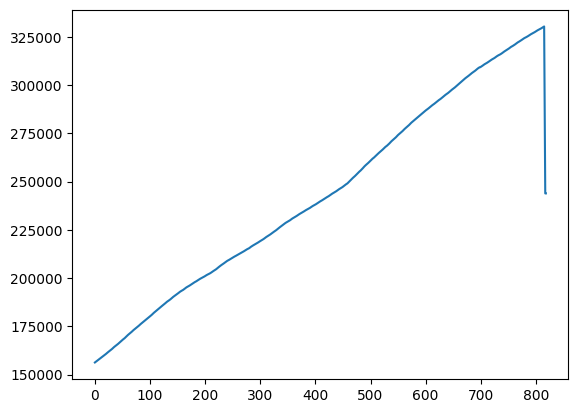

In [13]:
comb = list(data) + y_pred.tolist()
plt.plot(comb)
plt.show()

In [14]:
# ARMA 
arma_model = ARIMA(data, order=(1,0,1))
arma_fit = arma_model.fit()

/home/varaprasad/miniconda3/envs/llama/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/varaprasad/miniconda3/envs/llama/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/varaprasad/miniconda3/envs/llama/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [15]:
y_pred = arma_fit.forecast(steps=3)
y_pred

2020-01-01    330393.426358
2020-02-01    330393.130502
2020-03-01    330392.834648
Freq: MS, Name: predicted_mean, dtype: float64

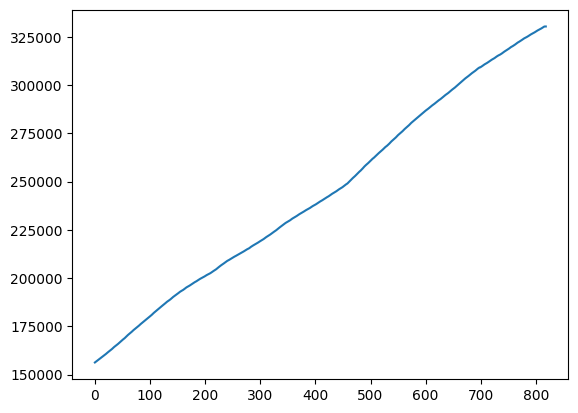

In [16]:
comb = list(data) + y_pred.tolist()
plt.plot(comb)
plt.show()

In [22]:
# ARIMA
arima_model = ARIMA(data, order=(1,1,1),freq="MS")
arima_fit = arima_model.fit()

/home/varaprasad/miniconda3/envs/llama/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [23]:
y_pred = arima_fit.forecast(steps=3)
y_pred


2020-01-01    330463.047515
2020-02-01    330612.000402
2020-03-01    330756.917078
Freq: MS, Name: predicted_mean, dtype: float64

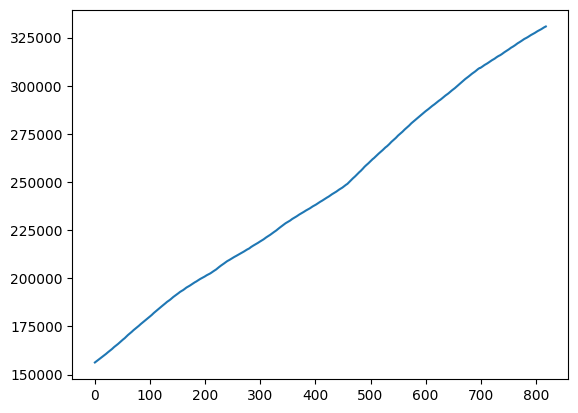

In [24]:
comb = list(data) + y_pred.tolist()
plt.plot(comb)
plt.show()

In [25]:
arima_fit.predict(0,5)

1952-01-01         0.000000
1952-02-01    157264.001790
1952-03-01    156747.001676
1952-04-01    156931.775785
1952-05-01    157147.607936
1952-06-01    157332.778972
Freq: MS, Name: predicted_mean, dtype: float64

In [26]:
data.head()

date
1952-01-01    156309.0
1952-02-01    156527.0
1952-03-01    156731.0
1952-04-01    156943.0
1952-05-01    157140.0
Name: value, dtype: float64